In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from pymongo import MongoClient
from pandas.io.json import json_normalize
import re

In [2]:
plt.style.use('ggplot')
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  #解决seaborn中文字体显示问题
plt.rc('figure', figsize=(10, 10))  # Set the figure size
plt.rcParams["figure.dpi"] =mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
%matplotlib inline

In [3]:
conn = MongoClient(host='localhost', port=27017)  
db = conn.get_database('douban')  # connect to the douban database in MongoDB

repost = db.get_collection('douban_movie3') # connect to the collection douban_movie3
mon_data = repost.find()  # find all the data infomation

In [21]:
data = json_normalize([comment for comment in mon_data])

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 7 columns):
_id              750 non-null object
description      748 non-null object
evaluation       750 non-null object
introduction     750 non-null object
movie_name       750 non-null object
serial_number    750 non-null object
star             750 non-null object
dtypes: object(7)
memory usage: 41.1+ KB


In [23]:
data = data[:250]

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
_id              250 non-null object
description      250 non-null object
evaluation       250 non-null object
introduction     250 non-null object
movie_name       250 non-null object
serial_number    250 non-null object
star             250 non-null object
dtypes: object(7)
memory usage: 13.8+ KB


In [25]:
data

,_id,description,evaluation,introduction,movie_name,serial_number,star
0,5cc1978df06fac32e401dbf7,希望让人自由。,1400939人评价,导演:弗兰克·德拉邦特FrankDarabont主演:蒂姆·罗宾斯TimRobbins/.....,肖申克的救赎,1,9.6
1,5cc1978df06fac32e401dbf8,风华绝代。,1037507人评价,导演:陈凯歌KaigeChen主演:张国荣LeslieCheung/张丰毅FengyiZha...,霸王别姬,2,9.6
2,5cc1978df06fac32e401dbf9,怪蜀黍和小萝莉不得不说的故事。,1279733人评价,导演:吕克·贝松LucBesson主演:让·雷诺JeanReno/娜塔莉·波特曼...199...,这个杀手不太冷,3,9.4
3,5cc1978df06fac32e401dbfa,一部美国近现代史。,1103343人评价,导演:罗伯特·泽米吉斯RobertZemeckis主演:汤姆·汉克斯TomHanks/......,阿甘正传,4,9.4
4,5cc1978df06fac32e401dbfb,最美的谎言。,646041人评价,导演:罗伯托·贝尼尼RobertoBenigni主演:罗伯托·贝尼尼RobertoBeni....,美丽人生,5,9.5
5,5cc1978df06fac32e401dbfc,失去的才是永恒的。,1044273人评价,导演:詹姆斯·卡梅隆JamesCameron主演:莱昂纳多·迪卡普里奥Leonardo......,泰坦尼克号,6,9.3
6,5cc1978df06fac32e401dbfd,最好的宫崎骏，最好的久石让。,1029047人评价,导演:宫崎骏HayaoMiyazaki主演:柊瑠美RumiHîragi/入野自由Miy......,千与千寻,7,9.3
7,5cc1978df06fac32e401dbfe,拯救一个人，就是拯救整个世界。,576108人评价,导演:史蒂文·斯皮尔伯格StevenSpielberg主演:连姆·尼森LiamNeeson....,辛德勒的名单,8,9.5
8,5cc1978df06fac32e401dbff,诺兰给了我们一场无法盗取的梦。,1109559人评价,导演:克里斯托弗·诺兰ChristopherNolan主演:莱昂纳多·迪卡普里奥Le...2...,盗梦空间,9,9.3
9,5cc1978df06fac32e401dc00,永远都不能忘记你所爱的人。,731272人评价,导演:莱塞·霍尔斯道姆LasseHallström主演:理查·基尔RichardGer......,忠犬八公的故事,10,9.3


In [26]:
data['serial_number'] = data['serial_number'].astype('int')
data['star'] = data['star'].astype('float')

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
_id              250 non-null object
description      250 non-null object
evaluation       250 non-null object
introduction     250 non-null object
movie_name       250 non-null object
serial_number    250 non-null int32
star             250 non-null float64
dtypes: float64(1), int32(1), object(5)
memory usage: 12.8+ KB


In [28]:
def removeStr(column,r1):
    newcolumn = []
    for x in column:
        newx = re.sub(r1,'',x)
        newcolumn.append(newx)
    return newcolumn
data.evaluation = removeStr(data.evaluation, '人评价')

In [29]:
data.head()

,_id,description,evaluation,introduction,movie_name,serial_number,star
0,5cc1978df06fac32e401dbf7,希望让人自由。,1400939,导演:弗兰克·德拉邦特FrankDarabont主演:蒂姆·罗宾斯TimRobbins/.....,肖申克的救赎,1,9.6
1,5cc1978df06fac32e401dbf8,风华绝代。,1037507,导演:陈凯歌KaigeChen主演:张国荣LeslieCheung/张丰毅FengyiZha...,霸王别姬,2,9.6
2,5cc1978df06fac32e401dbf9,怪蜀黍和小萝莉不得不说的故事。,1279733,导演:吕克·贝松LucBesson主演:让·雷诺JeanReno/娜塔莉·波特曼...199...,这个杀手不太冷,3,9.4
3,5cc1978df06fac32e401dbfa,一部美国近现代史。,1103343,导演:罗伯特·泽米吉斯RobertZemeckis主演:汤姆·汉克斯TomHanks/......,阿甘正传,4,9.4
4,5cc1978df06fac32e401dbfb,最美的谎言。,646041,导演:罗伯托·贝尼尼RobertoBenigni主演:罗伯托·贝尼尼RobertoBeni....,美丽人生,5,9.5


In [30]:
data['evaluation'] =data['evaluation'].astype('int')

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
_id              250 non-null object
description      250 non-null object
evaluation       250 non-null int32
introduction     250 non-null object
movie_name       250 non-null object
serial_number    250 non-null int32
star             250 non-null float64
dtypes: float64(1), int32(2), object(4)
memory usage: 11.8+ KB


In [36]:
# #显示所有行
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth',1000)
data.introduction.sample(10)

171            导演:爱德华·兹威克EdwardZwick主演:布拉德·皮特BradPitt/安东...1994/美国/剧情爱情战争西部
69            导演:史蒂文·斯皮尔伯格StevenSpielberg主演:汤姆·汉克斯TomHanks...1998/美国/剧情历史战争
78           导演:梅尔·吉布森MelGibson主演:梅尔·吉布森MelGibson/苏菲·玛...1995/美国/动作传记剧情历史战争
216       导演:阿兰·葛斯彭纳AlainGsponer主演:阿努克·斯特芬AnukSteffen/...2015/德国瑞士南非/剧情冒险家庭
35            导演:涅提·蒂瓦里NiteshTiwari主演:阿米尔·汗AamirKhan/法缇玛...2016/印度/剧情传记运动家庭
37     导演:刘镇伟JeffreyLau主演:周星驰StephenChow/吴孟达ManTatNg...1995/香港中国大陆/喜剧爱情奇幻古装
96             导演:王家卫KarWaiWong主演:林青霞BrigitteLin/金城武TakeshiK...1994/香港/剧情爱情
222           导演:爱德华·兹威克EdwardZwick主演:莱昂纳多·迪卡普里奥Leonardo...2006/美国德国/剧情惊悚冒险
132             导演:詹姆斯·温JamesWan主演:雷·沃纳尔LeighWhannell/加利·艾...2004/美国/悬疑惊悚恐怖
81       导演:王家卫KarWaiWong主演:张国荣LeslieCheung/梁朝伟TonyLeu...1997/香港日本韩国/剧情爱情同性
Name: introduction, dtype: object

In [37]:
def get_year(col):
    all_year=[]
    for y in col:
        year = re.findall(r'\d+', y)[0]
        all_year.append(year)
    return all_year
data['year'] = get_year(data.introduction)

In [38]:
data.head()

,_id,description,evaluation,introduction,movie_name,serial_number,star,year
0,5cc1978df06fac32e401dbf7,希望让人自由。,1400939,导演:弗兰克·德拉邦特FrankDarabont主演:蒂姆·罗宾斯TimRobbins/...1994/美国/犯罪剧情,肖申克的救赎,1,9.6,1994
1,5cc1978df06fac32e401dbf8,风华绝代。,1037507,导演:陈凯歌KaigeChen主演:张国荣LeslieCheung/张丰毅FengyiZha...1993/中国大陆香港/剧情爱情同性,霸王别姬,2,9.6,1993
2,5cc1978df06fac32e401dbf9,怪蜀黍和小萝莉不得不说的故事。,1279733,导演:吕克·贝松LucBesson主演:让·雷诺JeanReno/娜塔莉·波特曼...1994/法国/剧情动作犯罪,这个杀手不太冷,3,9.4,1994
3,5cc1978df06fac32e401dbfa,一部美国近现代史。,1103343,导演:罗伯特·泽米吉斯RobertZemeckis主演:汤姆·汉克斯TomHanks/...1994/美国/剧情爱情,阿甘正传,4,9.4,1994
4,5cc1978df06fac32e401dbfb,最美的谎言。,646041,导演:罗伯托·贝尼尼RobertoBenigni主演:罗伯托·贝尼尼RobertoBeni...1997/意大利/剧情喜剧爱情战争,美丽人生,5,9.5,1997


In [39]:
data['year'] = data['year'].astype('int')

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 8 columns):
_id              250 non-null object
description      250 non-null object
evaluation       250 non-null int32
introduction     250 non-null object
movie_name       250 non-null object
serial_number    250 non-null int32
star             250 non-null float64
year             250 non-null int32
dtypes: float64(1), int32(3), object(4)
memory usage: 12.8+ KB


In [54]:
def remove_year(col):
    new_intro=[]
    for y in col:
        year_index = re.findall(r'\d+', y)[0]
        new_introduction = re.sub(year_index, '|',y)
        new_intro.append(new_introduction)
    return new_intro

In [55]:
data['intro'] = remove_year(data.introduction)

In [56]:
data.head()

,_id,description,evaluation,introduction,movie_name,serial_number,star,year,intro
0,5cc1978df06fac32e401dbf7,希望让人自由。,1400939,导演:弗兰克·德拉邦特FrankDarabont主演:蒂姆·罗宾斯TimRobbins/...1994/美国/犯罪剧情,肖申克的救赎,1,9.6,1994,导演:弗兰克·德拉邦特FrankDarabont主演:蒂姆·罗宾斯TimRobbins/...|/美国/犯罪剧情
1,5cc1978df06fac32e401dbf8,风华绝代。,1037507,导演:陈凯歌KaigeChen主演:张国荣LeslieCheung/张丰毅FengyiZha...1993/中国大陆香港/剧情爱情同性,霸王别姬,2,9.6,1993,导演:陈凯歌KaigeChen主演:张国荣LeslieCheung/张丰毅FengyiZha...|/中国大陆香港/剧情爱情同性
2,5cc1978df06fac32e401dbf9,怪蜀黍和小萝莉不得不说的故事。,1279733,导演:吕克·贝松LucBesson主演:让·雷诺JeanReno/娜塔莉·波特曼...1994/法国/剧情动作犯罪,这个杀手不太冷,3,9.4,1994,导演:吕克·贝松LucBesson主演:让·雷诺JeanReno/娜塔莉·波特曼...|/法国/剧情动作犯罪
3,5cc1978df06fac32e401dbfa,一部美国近现代史。,1103343,导演:罗伯特·泽米吉斯RobertZemeckis主演:汤姆·汉克斯TomHanks/...1994/美国/剧情爱情,阿甘正传,4,9.4,1994,导演:罗伯特·泽米吉斯RobertZemeckis主演:汤姆·汉克斯TomHanks/...|/美国/剧情爱情
4,5cc1978df06fac32e401dbfb,最美的谎言。,646041,导演:罗伯托·贝尼尼RobertoBenigni主演:罗伯托·贝尼尼RobertoBeni...1997/意大利/剧情喜剧爱情战争,美丽人生,5,9.5,1997,导演:罗伯托·贝尼尼RobertoBenigni主演:罗伯托·贝尼尼RobertoBeni...|/意大利/剧情喜剧爱情战争


In [59]:
def get_director_country(col):
    all_director=[]
    all_country=[]
    for y in col:
        director, country = y.split('|')[0],y.split('|')[1]
        all_director.append(director)
        all_country.append(country)
    return all_director,all_country

In [61]:
data['director'],data['country'] = get_director_country(data.intro)

In [62]:
data.head()

,_id,description,evaluation,introduction,movie_name,serial_number,star,year,intro,director,country
0,5cc1978df06fac32e401dbf7,希望让人自由。,1400939,导演:弗兰克·德拉邦特FrankDarabont主演:蒂姆·罗宾斯TimRobbins/...1994/美国/犯罪剧情,肖申克的救赎,1,9.6,1994,导演:弗兰克·德拉邦特FrankDarabont主演:蒂姆·罗宾斯TimRobbins/...|/美国/犯罪剧情,导演:弗兰克·德拉邦特FrankDarabont主演:蒂姆·罗宾斯TimRobbins/...,/美国/犯罪剧情
1,5cc1978df06fac32e401dbf8,风华绝代。,1037507,导演:陈凯歌KaigeChen主演:张国荣LeslieCheung/张丰毅FengyiZha...1993/中国大陆香港/剧情爱情同性,霸王别姬,2,9.6,1993,导演:陈凯歌KaigeChen主演:张国荣LeslieCheung/张丰毅FengyiZha...|/中国大陆香港/剧情爱情同性,导演:陈凯歌KaigeChen主演:张国荣LeslieCheung/张丰毅FengyiZha...,/中国大陆香港/剧情爱情同性
2,5cc1978df06fac32e401dbf9,怪蜀黍和小萝莉不得不说的故事。,1279733,导演:吕克·贝松LucBesson主演:让·雷诺JeanReno/娜塔莉·波特曼...1994/法国/剧情动作犯罪,这个杀手不太冷,3,9.4,1994,导演:吕克·贝松LucBesson主演:让·雷诺JeanReno/娜塔莉·波特曼...|/法国/剧情动作犯罪,导演:吕克·贝松LucBesson主演:让·雷诺JeanReno/娜塔莉·波特曼...,/法国/剧情动作犯罪
3,5cc1978df06fac32e401dbfa,一部美国近现代史。,1103343,导演:罗伯特·泽米吉斯RobertZemeckis主演:汤姆·汉克斯TomHanks/...1994/美国/剧情爱情,阿甘正传,4,9.4,1994,导演:罗伯特·泽米吉斯RobertZemeckis主演:汤姆·汉克斯TomHanks/...|/美国/剧情爱情,导演:罗伯特·泽米吉斯RobertZemeckis主演:汤姆·汉克斯TomHanks/...,/美国/剧情爱情
4,5cc1978df06fac32e401dbfb,最美的谎言。,646041,导演:罗伯托·贝尼尼RobertoBenigni主演:罗伯托·贝尼尼RobertoBeni...1997/意大利/剧情喜剧爱情战争,美丽人生,5,9.5,1997,导演:罗伯托·贝尼尼RobertoBenigni主演:罗伯托·贝尼尼RobertoBeni...|/意大利/剧情喜剧爱情战争,导演:罗伯托·贝尼尼RobertoBenigni主演:罗伯托·贝尼尼RobertoBeni...,/意大利/剧情喜剧爱情战争


In [64]:
data = data.drop(['introduction'], axis=1)

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 10 columns):
_id              250 non-null object
description      250 non-null object
evaluation       250 non-null int32
movie_name       250 non-null object
serial_number    250 non-null int32
star             250 non-null float64
year             250 non-null int32
intro            250 non-null object
director         250 non-null object
country          250 non-null object
dtypes: float64(1), int32(3), object(6)
memory usage: 16.7+ KB


In [68]:
data = data.drop(['intro','_id'], axis=1)

In [69]:
data.head()

,description,evaluation,movie_name,serial_number,star,year,director,country
0,希望让人自由。,1400939,肖申克的救赎,1,9.6,1994,导演:弗兰克·德拉邦特FrankDarabont主演:蒂姆·罗宾斯TimRobbins/...,/美国/犯罪剧情
1,风华绝代。,1037507,霸王别姬,2,9.6,1993,导演:陈凯歌KaigeChen主演:张国荣LeslieCheung/张丰毅FengyiZha...,/中国大陆香港/剧情爱情同性
2,怪蜀黍和小萝莉不得不说的故事。,1279733,这个杀手不太冷,3,9.4,1994,导演:吕克·贝松LucBesson主演:让·雷诺JeanReno/娜塔莉·波特曼...,/法国/剧情动作犯罪
3,一部美国近现代史。,1103343,阿甘正传,4,9.4,1994,导演:罗伯特·泽米吉斯RobertZemeckis主演:汤姆·汉克斯TomHanks/...,/美国/剧情爱情
4,最美的谎言。,646041,美丽人生,5,9.5,1997,导演:罗伯托·贝尼尼RobertoBenigni主演:罗伯托·贝尼尼RobertoBeni...,/意大利/剧情喜剧爱情战争


In [70]:
data.set_index('serial_number', inplace =True)

In [71]:
data.head()

,description,evaluation,movie_name,star,year,director,country
serial_number,,,,,,,
1,希望让人自由。,1400939,肖申克的救赎,9.6,1994,导演:弗兰克·德拉邦特FrankDarabont主演:蒂姆·罗宾斯TimRobbins/...,/美国/犯罪剧情
2,风华绝代。,1037507,霸王别姬,9.6,1993,导演:陈凯歌KaigeChen主演:张国荣LeslieCheung/张丰毅FengyiZha...,/中国大陆香港/剧情爱情同性
3,怪蜀黍和小萝莉不得不说的故事。,1279733,这个杀手不太冷,9.4,1994,导演:吕克·贝松LucBesson主演:让·雷诺JeanReno/娜塔莉·波特曼...,/法国/剧情动作犯罪
4,一部美国近现代史。,1103343,阿甘正传,9.4,1994,导演:罗伯特·泽米吉斯RobertZemeckis主演:汤姆·汉克斯TomHanks/...,/美国/剧情爱情
5,最美的谎言。,646041,美丽人生,9.5,1997,导演:罗伯托·贝尼尼RobertoBenigni主演:罗伯托·贝尼尼RobertoBeni...,/意大利/剧情喜剧爱情战争


# Data Visualization

In [104]:
import matplotlib.pyplot as plt
import operator

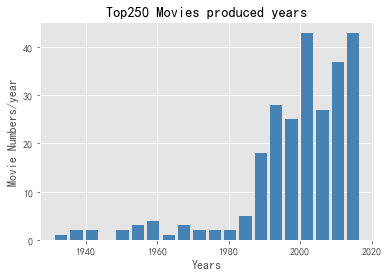

In [105]:
plt.hist(data["year"],color='steelblue',bins=20,rwidth=0.8)
plt.title('Top250 Movies produced years')
plt.xlabel('Years')
plt.ylabel('Movie Numbers/year')
plt.show()

In [106]:
year_dict = {}
for year in data["year"]:
    if year in year_dict:
        year_dict[year] += 1
    else:
        year_dict[year] = 1

In [107]:
year_most = max(year_dict, key = year_dict.get)

In [108]:
year_most

2010

In [119]:
print("上榜电影数目最多的是{}年，共计{}部".format(year_most, year_dict[year_most]))

sorted_year_dict = sorted(year_dict.items(), key=operator.itemgetter(1), reverse=True)
eight_most_year = sorted_year_dict[:8]
eight_most_year

上榜电影数目最多的是2010年，共计14部


[(2010, 14),
 (2004, 13),
 (1994, 11),
 (2013, 11),
 (2015, 10),
 (1997, 9),
 (2001, 9),
 (2009, 9)]

## 电影评分

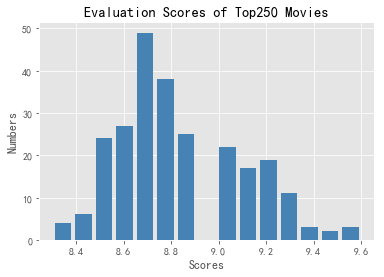

In [120]:
plt.hist(data.star,bins=15,rwidth=0.8,color='steelblue')
plt.xlabel('Scores')
plt.ylabel('Numbers')
plt.title('Evaluation Scores of Top250 Movies')
plt.show()

In [121]:
data.star.describe()

count    250.000000
mean       8.835200
std        0.267445
min        8.300000
25%        8.700000
50%        8.800000
75%        9.000000
max        9.600000
Name: star, dtype: float64

In [122]:
rating_mean = data["star"].mean()
rating_median = data["star"].median()
rating_stdev = np.std(data["star"])

print("电影评分的平均值为%.2f，中位数为%.2f，标准差为%.4f"%(rating_mean, rating_median, rating_stdev))

电影评分的平均值为8.84，中位数为8.80，标准差为0.2669


In [124]:
most_year_rating_mean = {}

for item in eight_most_year:
    year_df = data[data["year"] == item[0]]
    most_year_rating_mean[item[0]] = year_df["star"].mean()
    
most_year_rating_mean

{2010: 8.700000000000001,
 2004: 8.76153846153846,
 1994: 9.036363636363635,
 2013: 8.772727272727273,
 2015: 8.75,
 1997: 8.944444444444445,
 2001: 8.833333333333332,
 2009: 8.911111111111111}

In [125]:
movie_of_1994 = data[data["year"] == 1994]
movie_of_1994

,description,evaluation,movie_name,star,year,director,country
serial_number,,,,,,,
1,希望让人自由。,1400939,肖申克的救赎,9.6,1994,导演:弗兰克·德拉邦特FrankDarabont主演:蒂姆·罗宾斯TimRobbins/...,/美国/犯罪剧情
3,怪蜀黍和小萝莉不得不说的故事。,1279733,这个杀手不太冷,9.4,1994,导演:吕克·贝松LucBesson主演:让·雷诺JeanReno/娜塔莉·波特曼...,/法国/剧情动作犯罪
4,一部美国近现代史。,1103343,阿甘正传,9.4,1994,导演:罗伯特·泽米吉斯RobertZemeckis主演:汤姆·汉克斯TomHanks/...,/美国/剧情爱情
28,张艺谋最好的电影。,411949,活着,9.2,1994,导演:张艺谋YimouZhang主演:葛优YouGe/巩俐LiGong/姜武WuJiang,/中国大陆香港/剧情历史家庭
56,人生不能像做菜，把所有的料都准备好了才下锅。,291633,饮食男女,9.1,1994,导演:李安AngLee主演:郎雄SihungLung/杨贵媚Kuei-MeiYang/吴...,/台湾美国/剧情家庭
57,动物版《哈姆雷特》。,404755,狮子王,9.0,1994,导演:RogerAllers/罗伯·明可夫RobMinkoff主演:乔纳森·泰勒·托马...,/美国/剧情动画冒险歌舞家庭
75,故事的高级讲法。,463300,低俗小说,8.8,1994,导演:昆汀·塔伦蒂诺QuentinTarantino主演:约翰·特拉沃尔塔JohnTra...,/美国/剧情喜剧犯罪
90,一场华丽的意淫。,361067,阳光灿烂的日子,8.8,1994,导演:姜文WenJiang主演:夏雨YuXia/宁静JingNing/陶虹HongTao,/中国大陆香港/剧情爱情
97,寂寞没有期限。,442720,重庆森林,8.7,1994,导演:王家卫KarWaiWong主演:林青霞BrigitteLin/金城武TakeshiK...,/香港/剧情爱情


In [126]:
movie_of_1994 = data[data["year"] == 1997]
movie_of_1994

,description,evaluation,movie_name,star,year,director,country
serial_number,,,,,,,
5,最美的谎言。,646041,美丽人生,9.5,1997,导演:罗伯托·贝尼尼RobertoBenigni主演:罗伯托·贝尼尼RobertoBeni...,/意大利/剧情喜剧爱情战争
6,失去的才是永恒的。,1044273,泰坦尼克号,9.3,1997,导演:詹姆斯·卡梅隆JamesCameron主演:莱昂纳多·迪卡普里奥Leonardo...,/美国/剧情爱情灾难
65,奔跑的孩子是天使。,200788,小鞋子,9.2,1997,导演:马基德·马基迪MajidMajidi主演:法拉赫阿米尔·哈什米安AmirFa...,/伊朗/剧情儿童家庭
82,爱情纠缠，男女一致。,343880,春光乍泄,8.9,1997,导演:王家卫KarWaiWong主演:张国荣LeslieCheung/梁朝伟TonyLeu...,/香港日本韩国/剧情爱情同性
83,人生中应该拥有这样的一段豁然开朗。,376816,心灵捕手,8.8,1997,导演:格斯·范·桑特GusVanSant主演:马特·达蒙MattDamon/罗宾·...,/美国/剧情
89,人与自然的战争史诗。,315663,幽灵公主,8.8,1997,导演:宫崎骏HayaoMiyazaki主演:松田洋治YôjiMatsuda/石田百合...,/日本/动画奇幻冒险
176,好的剧本是，就算你猜到了结局也猜不到全部。,135898,未麻的部屋,8.9,1997,导演:今敏SatoshiKon主演:岩男润子JunkoIwao/松本梨香RicaMatsu...,/日本/动画奇幻惊悚
231,当发哥的风衣、墨镜出现在了凯奇身上⋯⋯,261441,变脸,8.4,1997,导演:吴宇森JohnWoo主演:约翰·特拉沃尔塔JohnTravolta/尼古拉斯...,/美国/动作科幻犯罪惊悚
240,一部能引人思考的科幻励志片。,120959,千钧一发,8.7,1997,导演:安德鲁·尼科尔AndrewNiccol主演:伊桑·霍克EthanHawke/乌玛...,/美国/剧情科幻惊悚


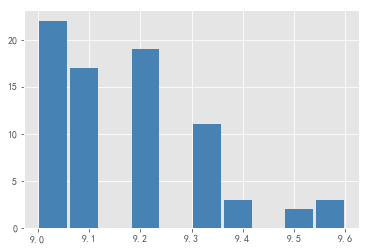

In [135]:
rating_over_9_df = data[data["star"] >= 9.0]
plt.hist(rating_over_9_df["star"], color='steelblue',bins=10,rwidth=0.9)
plt.show()

## 评价人数

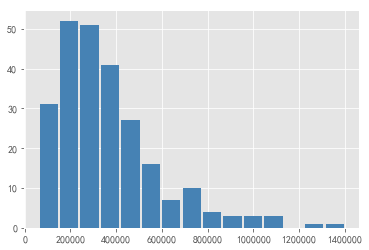

In [137]:
plt.hist(data["evaluation"],color='steelblue',bins=15,rwidth=0.9)
plt.show()

In [139]:
rating_people_mean = data["evaluation"].mean()
rating_people_median = data["evaluation"].median()
rating_people_stdev = np.std(data["evaluation"])

print("电影评分人数的平均值为%d，中位数为%d，标准差为%.2f"%(rating_people_mean, rating_people_median, rating_people_stdev))

电影评分人数的平均值为363932，中位数为313062，标准差为227912.56


In [144]:
rating_people_over_20w = data[data["evaluation"] > 200000].shape[0]
rate = rating_people_over_20w / data.shape[0]
print("250部电影中单部电影评价人数超过10万的有%d部，占比达到%.1f%%"%(rating_people_over_20w, rate*100))

250部电影中单部电影评价人数超过10万的有190部，占比达到76.0%


## 电影时长